In [97]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:


# Define the path to the Dataset folder
dataset_path = 'Dataset'

# Initialize lists to store metadata
styles = []
artists = []
genres = []
years = []
file_paths = []

# Iterate over each style folder
for style_folder in os.listdir(dataset_path):
    style_path = os.path.join(dataset_path, style_folder)
    if os.path.isdir(style_path):
        # Iterate over each artist folder
        for artist_folder in os.listdir(style_path):
            artist_path = os.path.join(style_path, artist_folder)
            if os.path.isdir(artist_path):
                # Iterate over each image file
                for image_file in os.listdir(artist_path):
                    if image_file.endswith('.jpg') or image_file.endswith('.png'):
                        # Extract metadata from the image file name
                        filename_parts = image_file.split('-')
                        genre = '-'.join(filename_parts[:-1])
                        year = filename_parts[-1].split('.')[0]
                        
                        # Append metadata to lists
                        styles.append(style_folder)
                        artists.append(artist_folder)
                        genres.append(genre)
                        years.append(year)
                        
                        # Append full file path
                        file_paths.append(os.path.join(artist_path, image_file))

# Create a dataframe from the lists
Dataset_df = pd.DataFrame({
    'Style': styles,
    'Artist': artists,
    'Genre': genres,
    'Year': years,
    'File Path': file_paths
})

Dataset_df.to_csv('Dataset_df.csv')

In [3]:
def move_to_genre(row):
    if not str(row['Year']).isdigit():
        row['Genre'] = f"{row['Genre']}-{row['Year']}"
        row['Year'] = None
    return row

In [4]:
Dataset_df = Dataset_df.apply(move_to_genre, axis=1)

In [99]:
# Iterate over each file path in the DataFrame
for index, row in Dataset_df.iterrows():
    file_path = row['File Path']
    
    # Open the image using PIL
    img = Image.open(file_path)
    
    # Get the dimensions (resolution) of the image
    width, height = img.size
    
    # Get the size of the image in bytes
    size = os.path.getsize(file_path)
    
    # Print the information
   # print(f"Image {index + 1}:")
   # print(f"Resolution: {width}x{height}")
   # print(f"Size: {size} bytes\n")
    
    # Optionally, you can also add this information to your DataFrame if needed
    Dataset_df.loc[index, 'Width'] = width
    Dataset_df.loc[index, 'Height'] = height
    Dataset_df.loc[index, 'Size'] = size

# Save the updated DataFrame
Dataset_df.to_csv('Dataset_df_with_dimensions.csv', index=False)

In [104]:
print(f"Width minimum: {min(Dataset_df['Width'])} Width maximum: {max(Dataset_df['Width'])} Height minimum: {min(Dataset_df['Height'])} Height maximum: {max(Dataset_df['Height'])}")

Width minimum: 47.0 Width maximum: 750.0 Height minimum: 42.0 Height maximum: 600.0


617

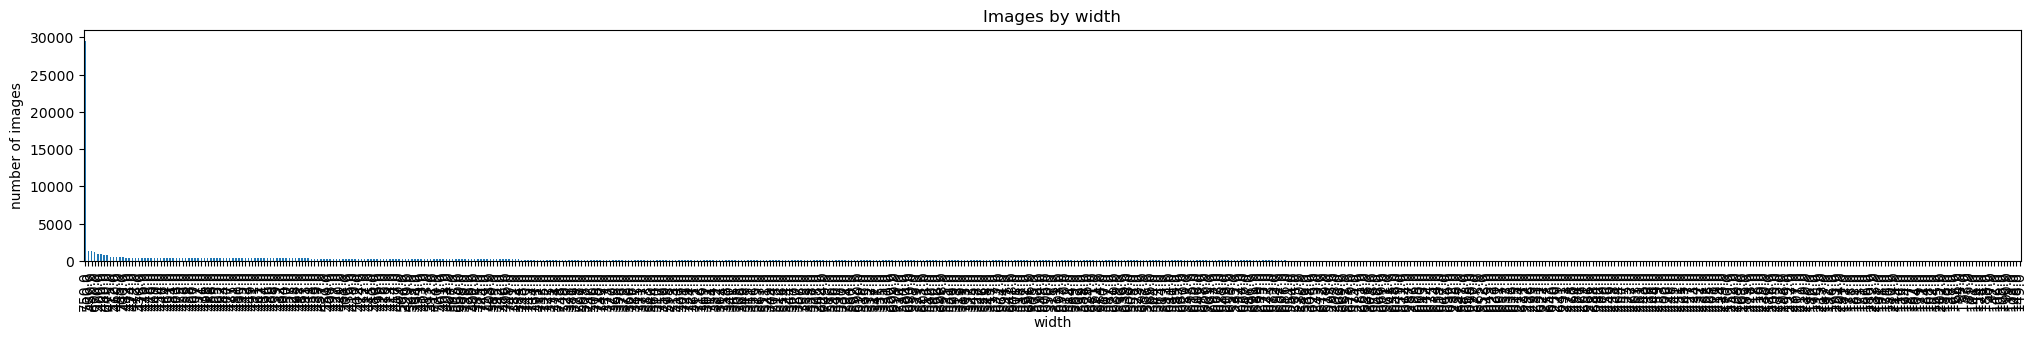

In [109]:
width_counts = Dataset_df.Width.value_counts()
Dataset_df.Width.value_counts().plot(kind='bar', figsize=(25,3))
plt.title("Images by width")
plt.ylabel('number of images')
plt.xlabel('width')
len(width_counts)



450

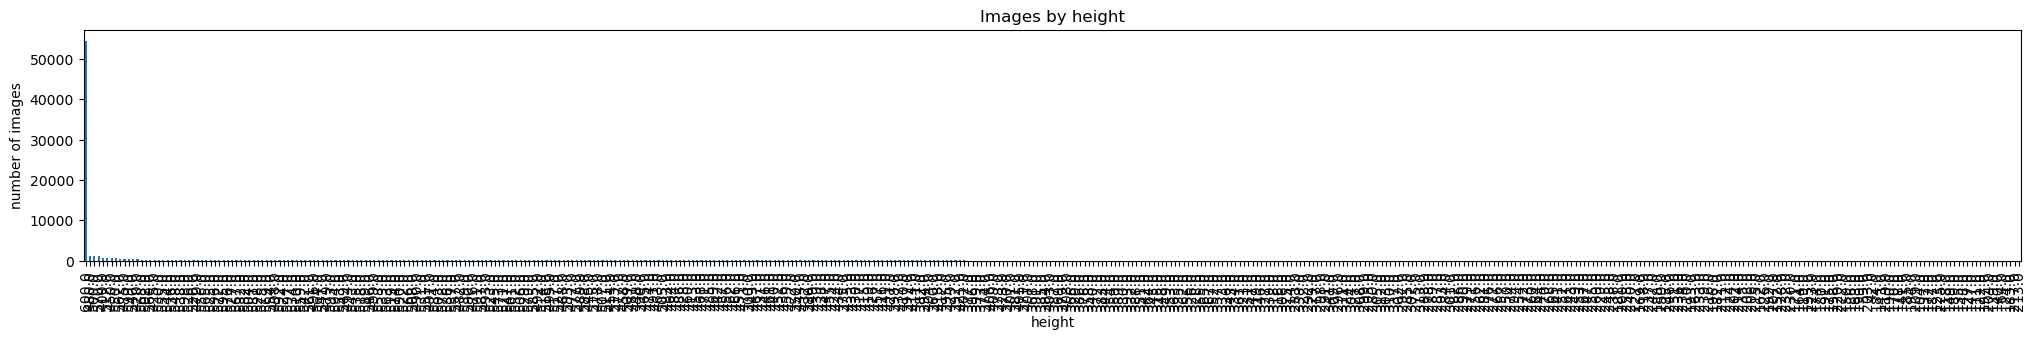

In [110]:
height_counts = Dataset_df.Height.value_counts()
Dataset_df.Height.value_counts().plot(kind='bar', figsize=(25,3))
plt.title("Images by height")
plt.ylabel('number of images')
plt.xlabel('height')
len(height_counts)

# Artist

In [60]:
artist_class = Dataset_df.Artist.value_counts()
len(artist_class)

1230

40

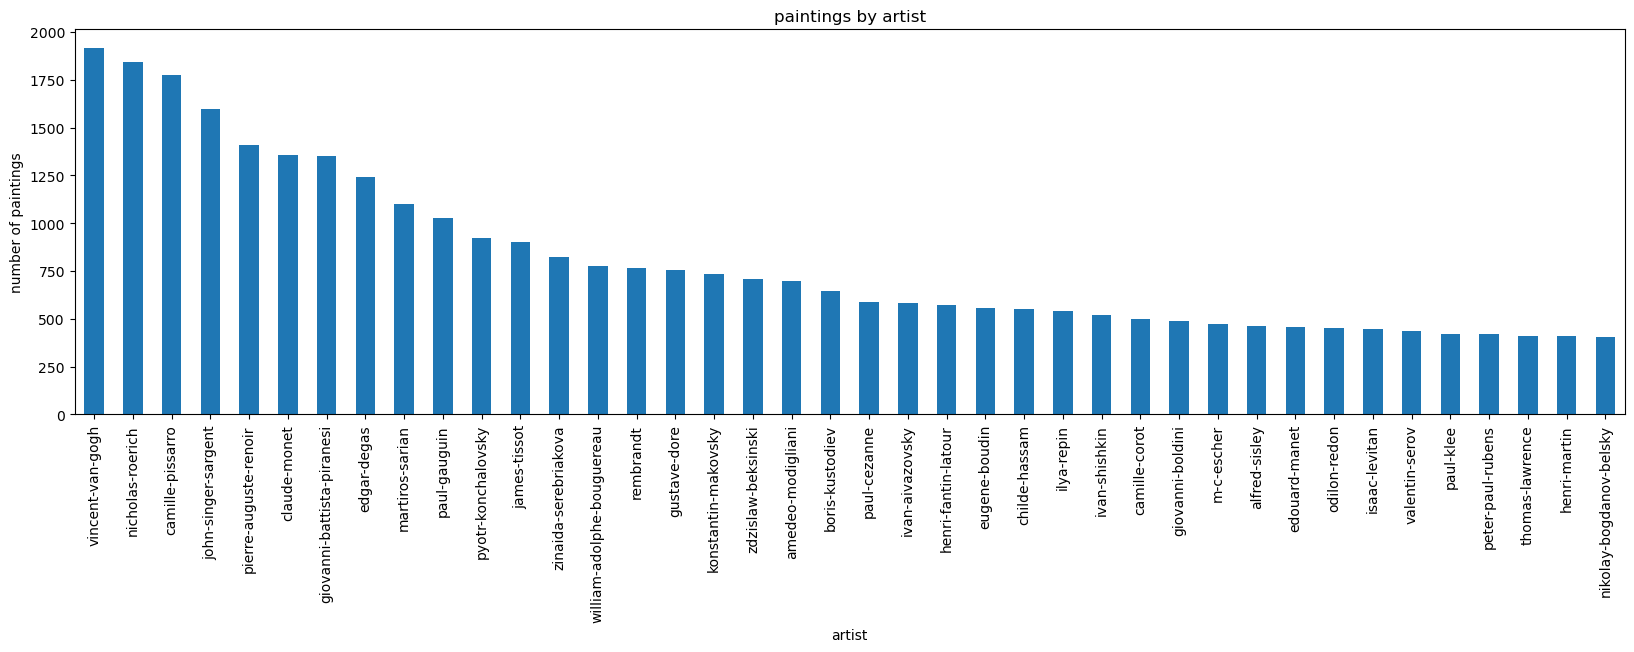

In [62]:
artist_counts = Dataset_df.Artist.value_counts()
Dataset_df.Artist.value_counts()[artist_counts > 400].plot(kind='bar', figsize=(20,5))
plt.title("paintings by artist")
plt.ylabel('number of paintings')
plt.xlabel('artist')
len(Dataset_df.Artist.value_counts()[artist_counts > 400])

# Genre
Is not classified. It's just a description. 
Looks like we will not be able to use it.

In [6]:
def painting_counts_histogram(column, minimum=100, largest=None):
    counts = Dataset_df[column].value_counts()
    if largest != None:
        Dataset_df[column].value_counts().nlargest(largest).plot(kind='bar', figsize=(20,5))
    else:
        Dataset_df[column].value_counts()[counts >= minimum].plot(kind='bar', figsize=(20,5))
    plt.title(f"paintings by {column}")
    plt.ylabel('number of paintings')
    plt.xlabel(column)
    return

30


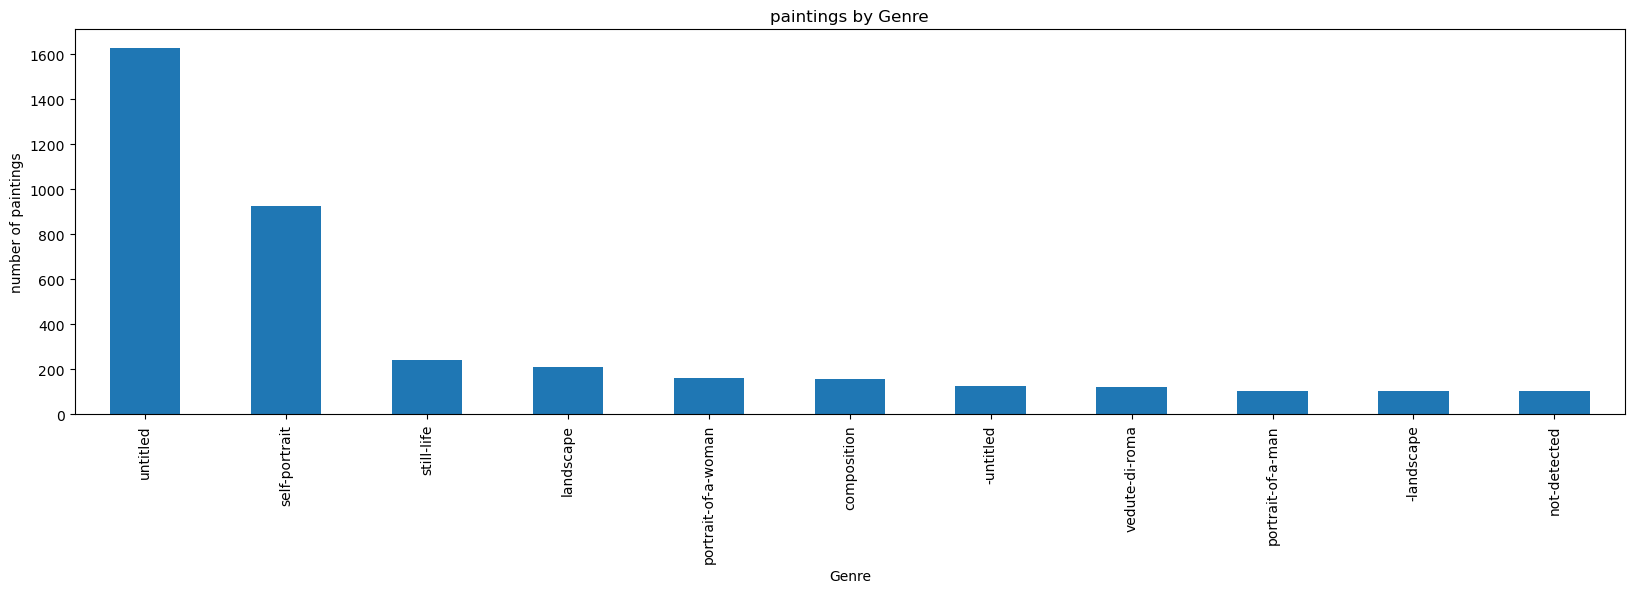

In [65]:
painting_counts_histogram('Genre', minimum=100)
genre_counts = Dataset_df['Genre'].value_counts()
print(genre_counts['sunset'])

In [10]:
len(Dataset_df['Genre'].unique())

72412

# Style

Style
impressionism                 16600
realism                       15401
romanticism                   14646
post_impressionism             9737
symbolism                      9079
expressionism                  8858
baroque                        7390
surrealism                     6213
abstract_expressionism         4839
rococo                         3607
ecole_de_paris                 2997
naive_art_primitivism          1930
neo_impressionism              1627
neoclassicism                  1129
pre_raphaelite_brotherhood      107
Name: count, dtype: int64


15

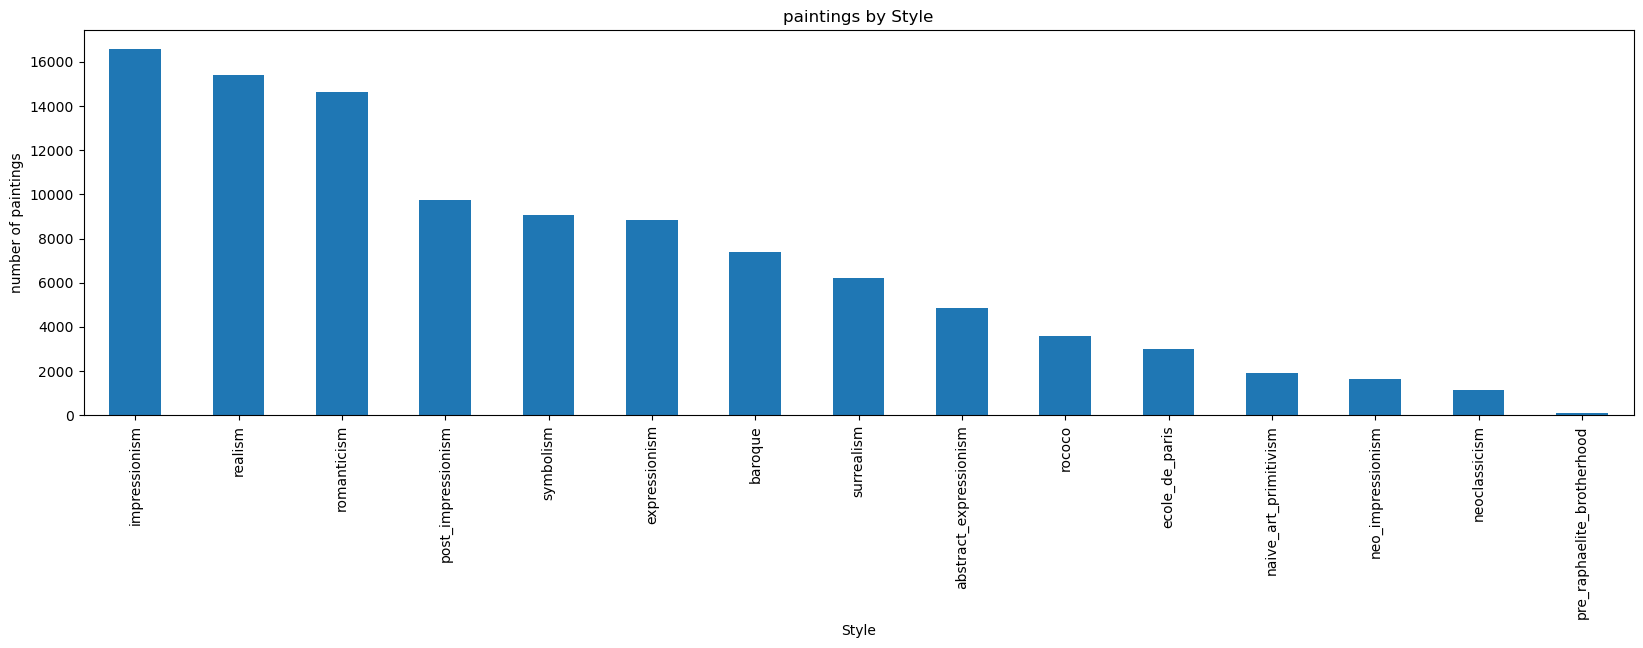

In [66]:
painting_counts_histogram('Style', minimum=0)
style_counts = Dataset_df['Style'].value_counts()
print(style_counts)
len(style_counts)

# Artist & Style

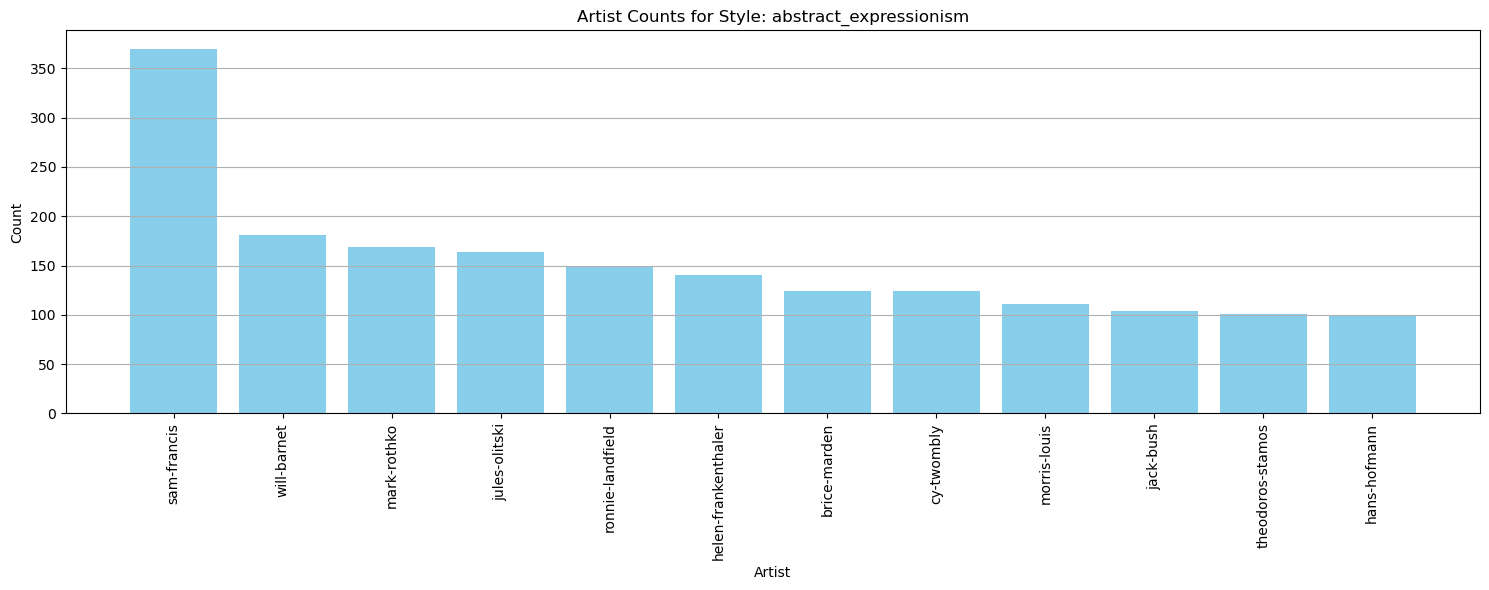

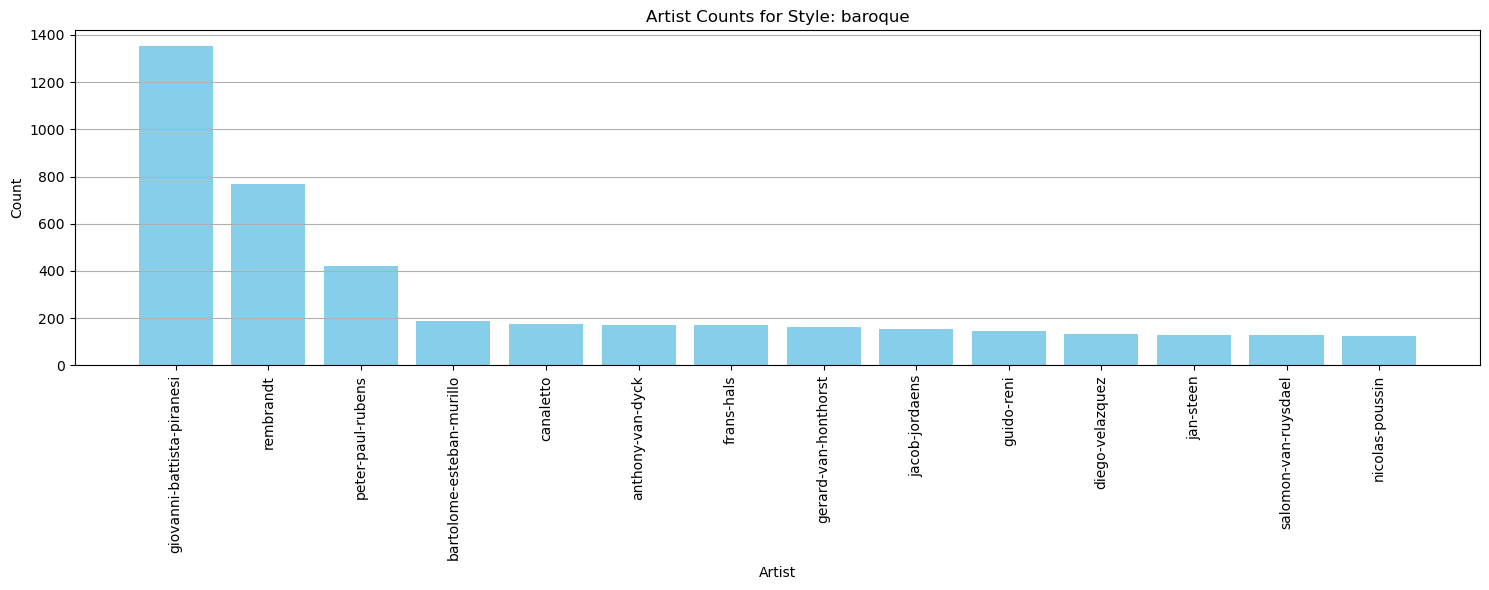

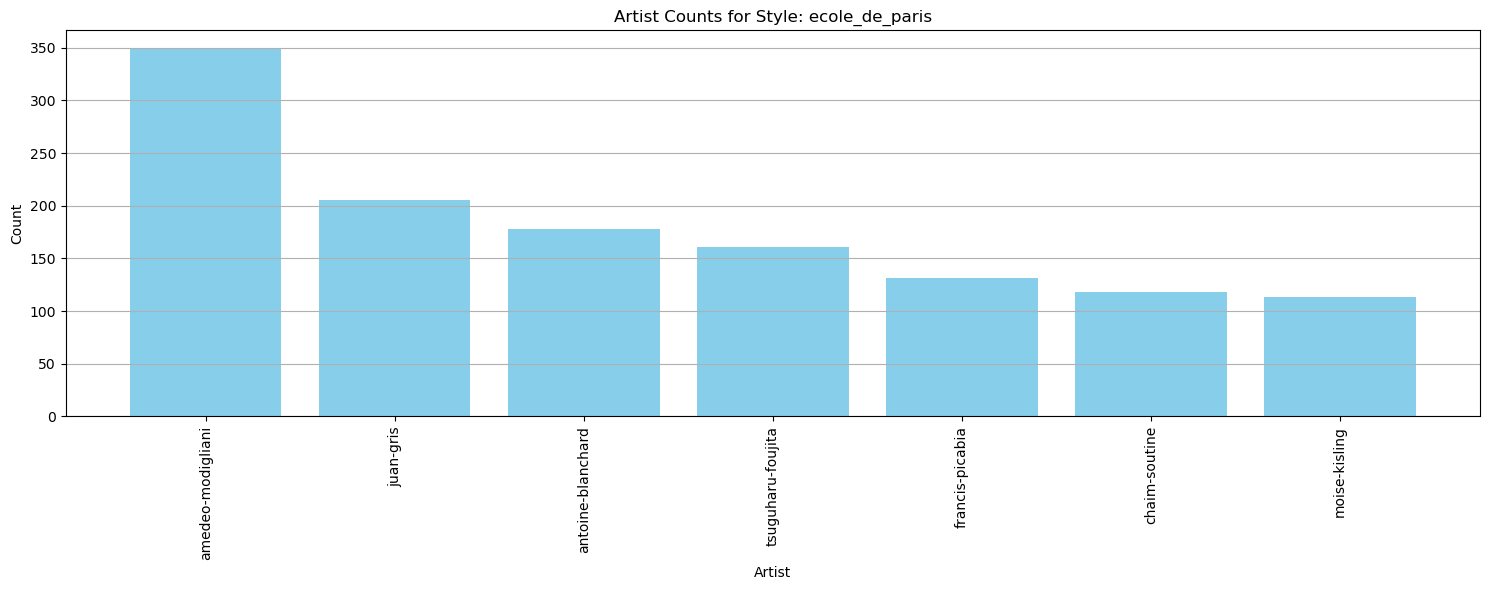

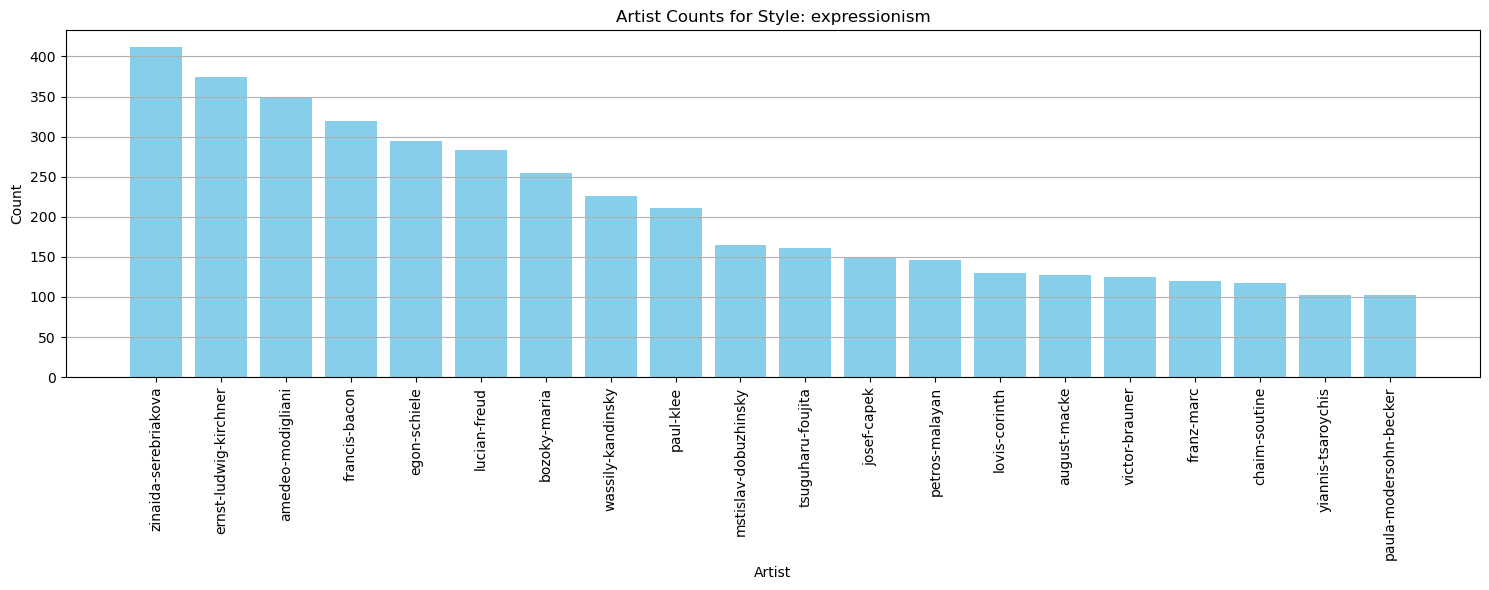

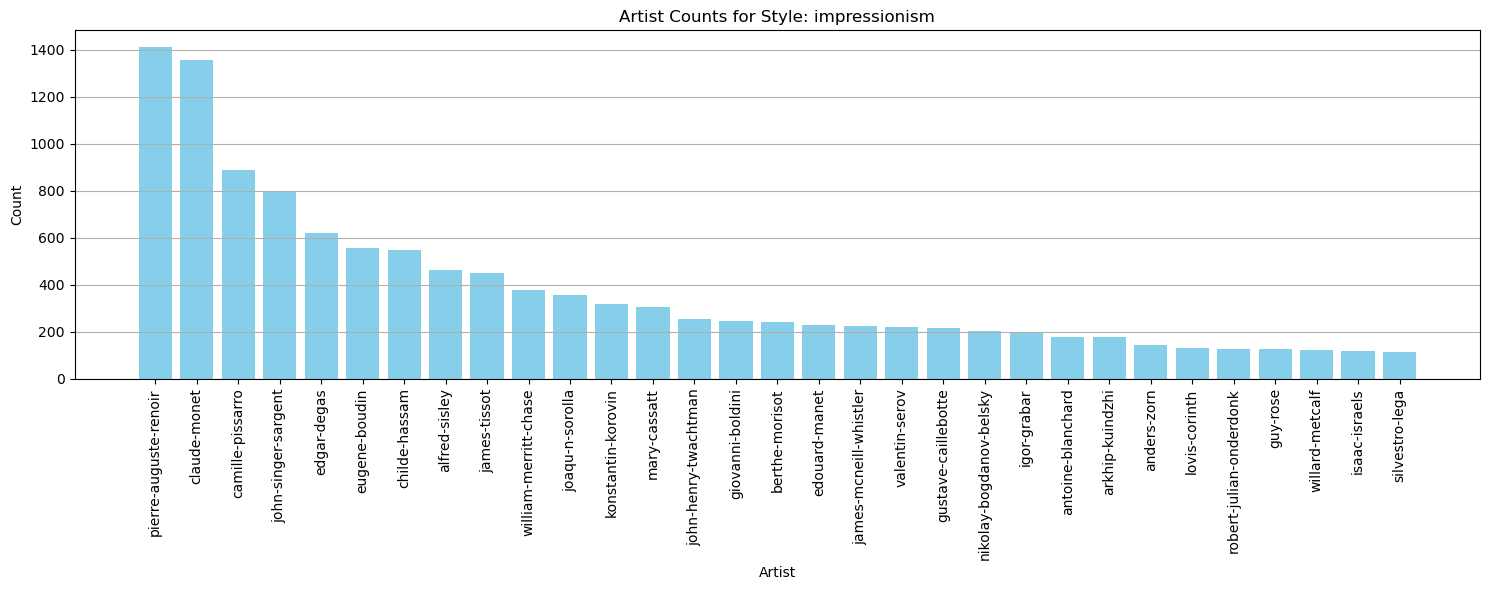

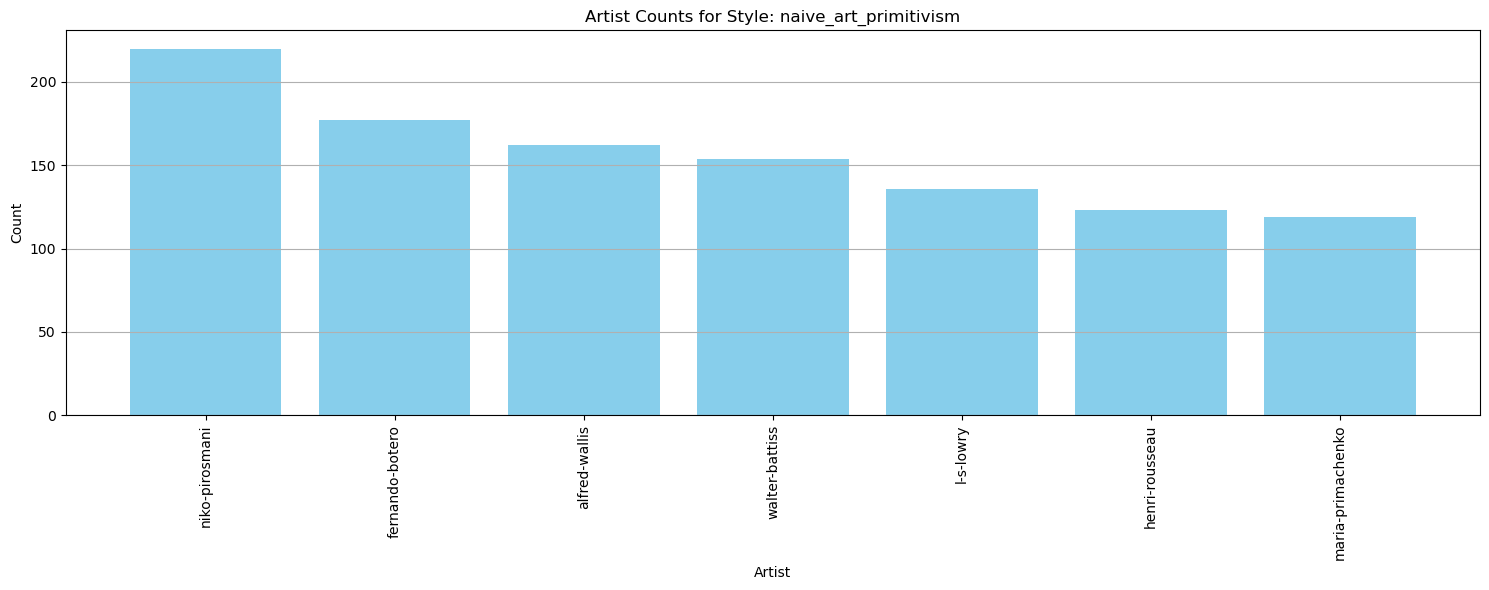

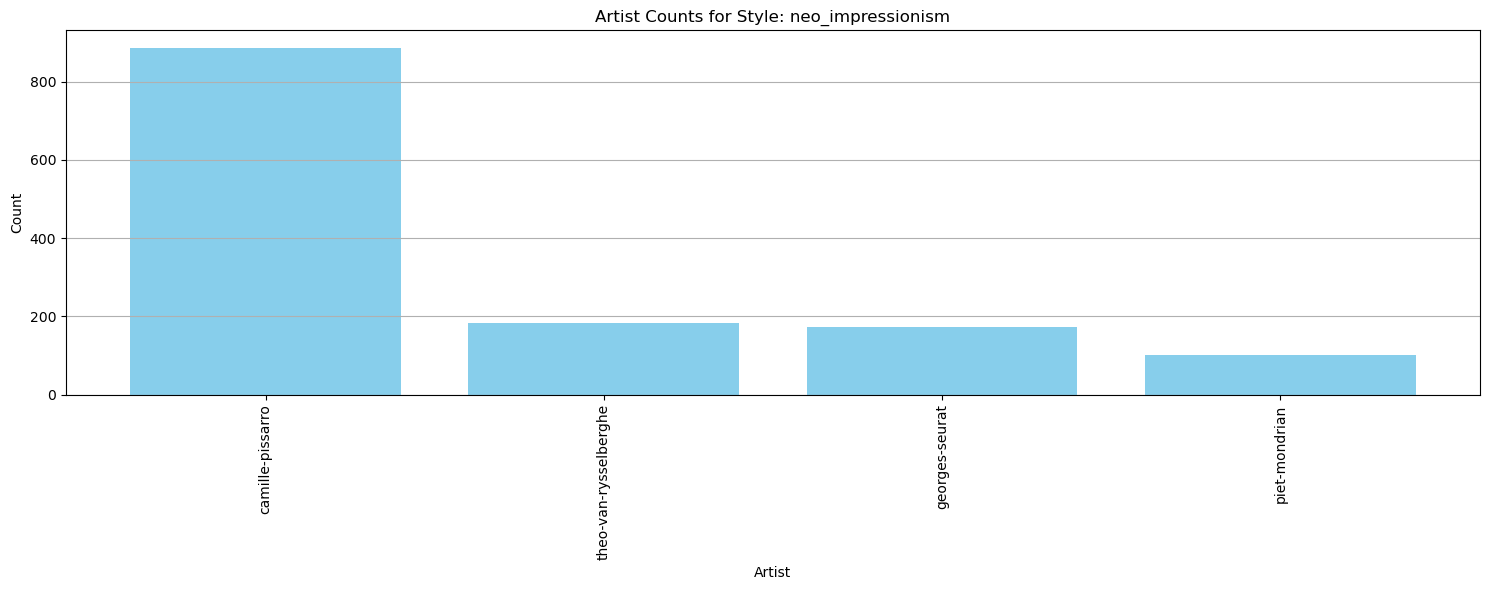

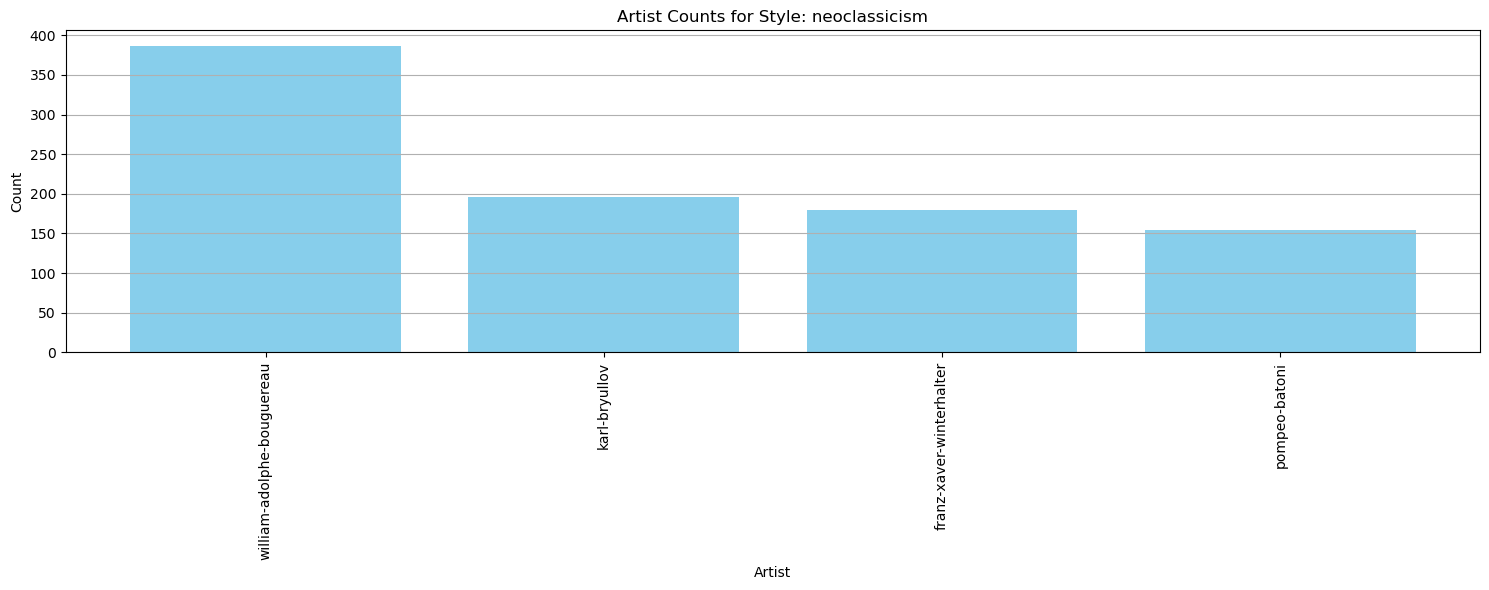

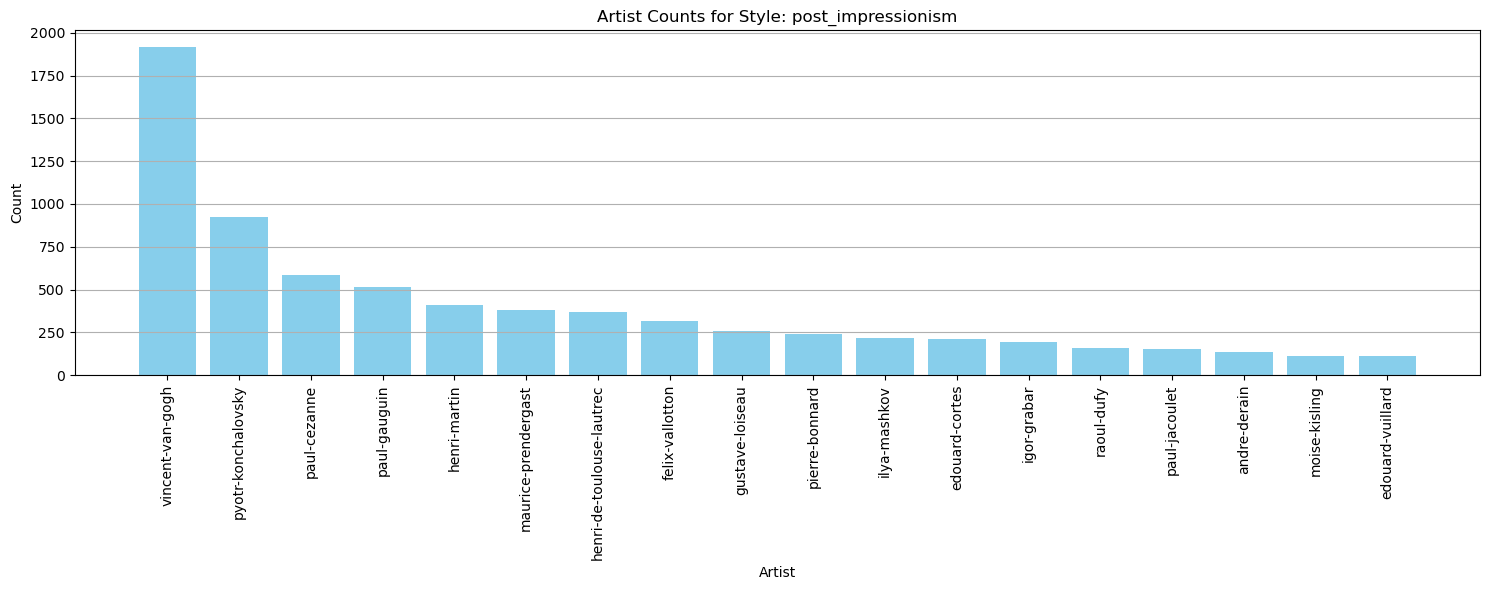

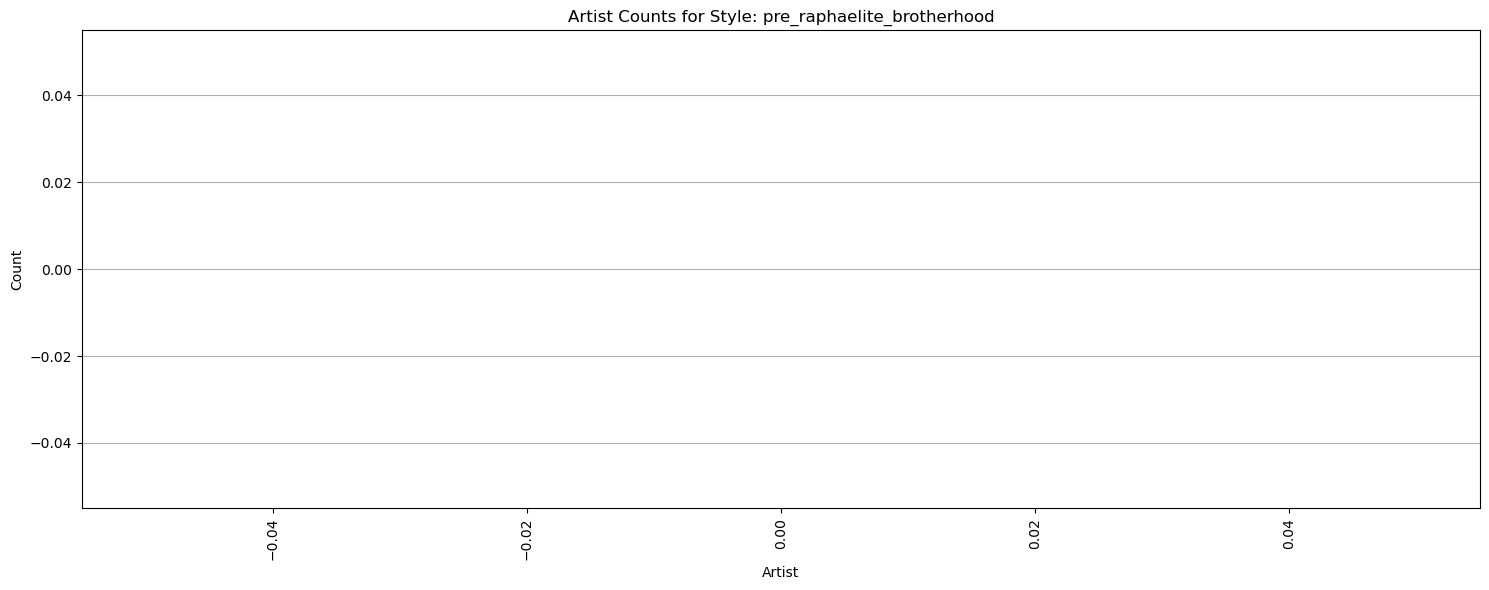

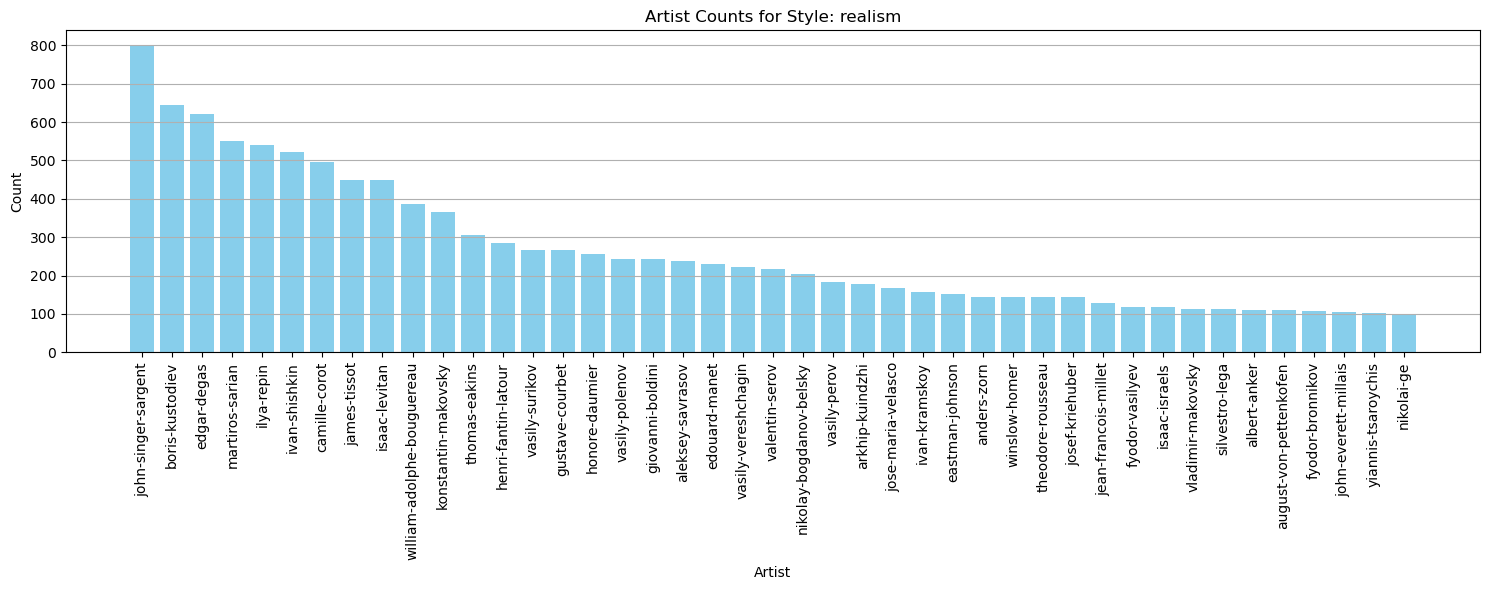

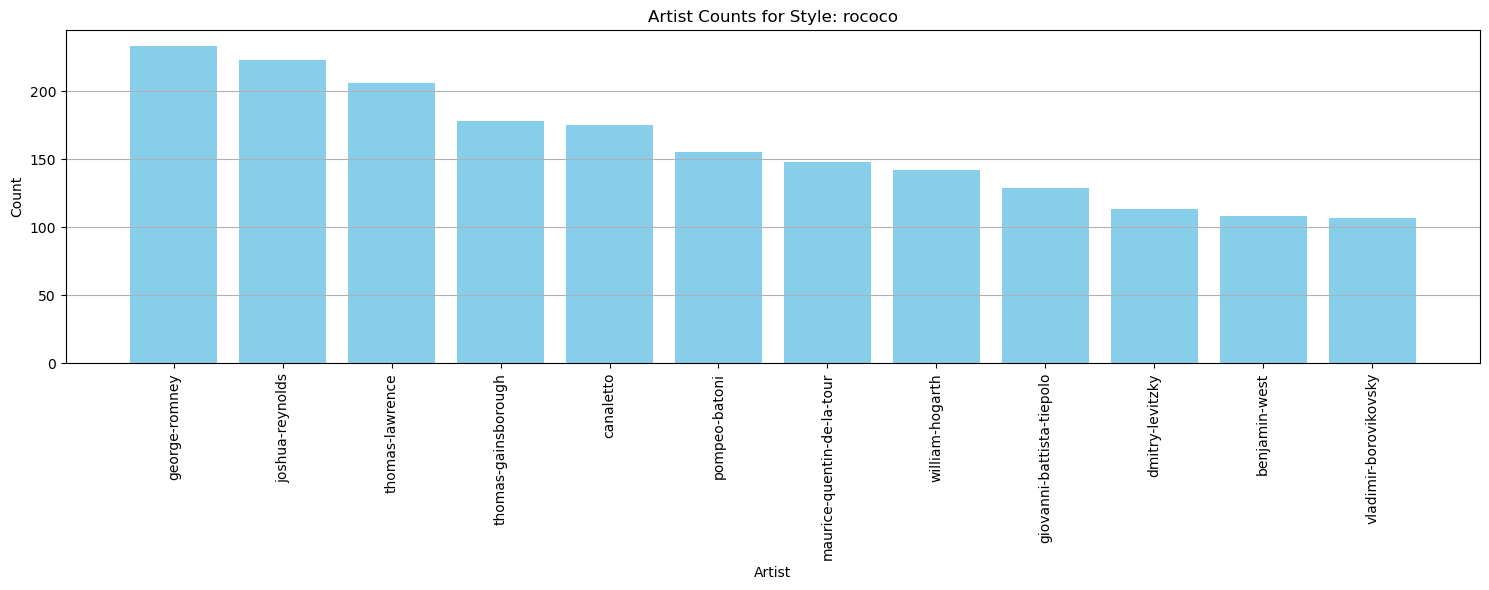

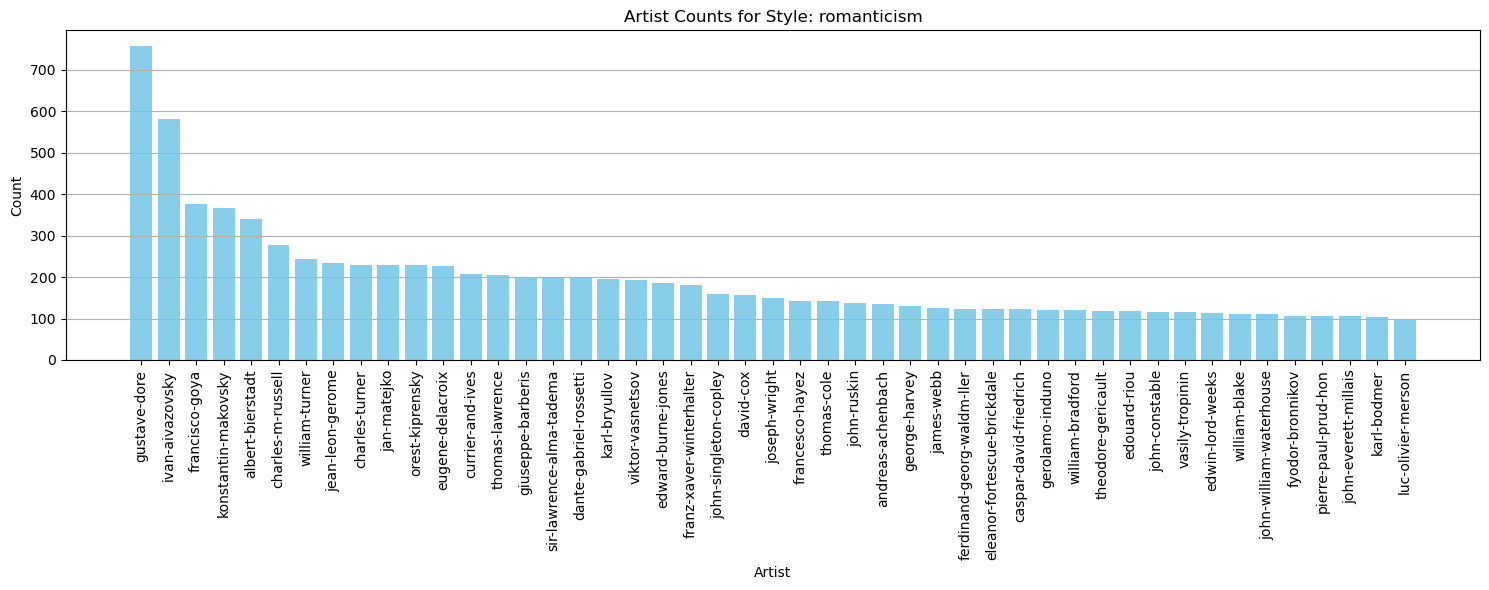

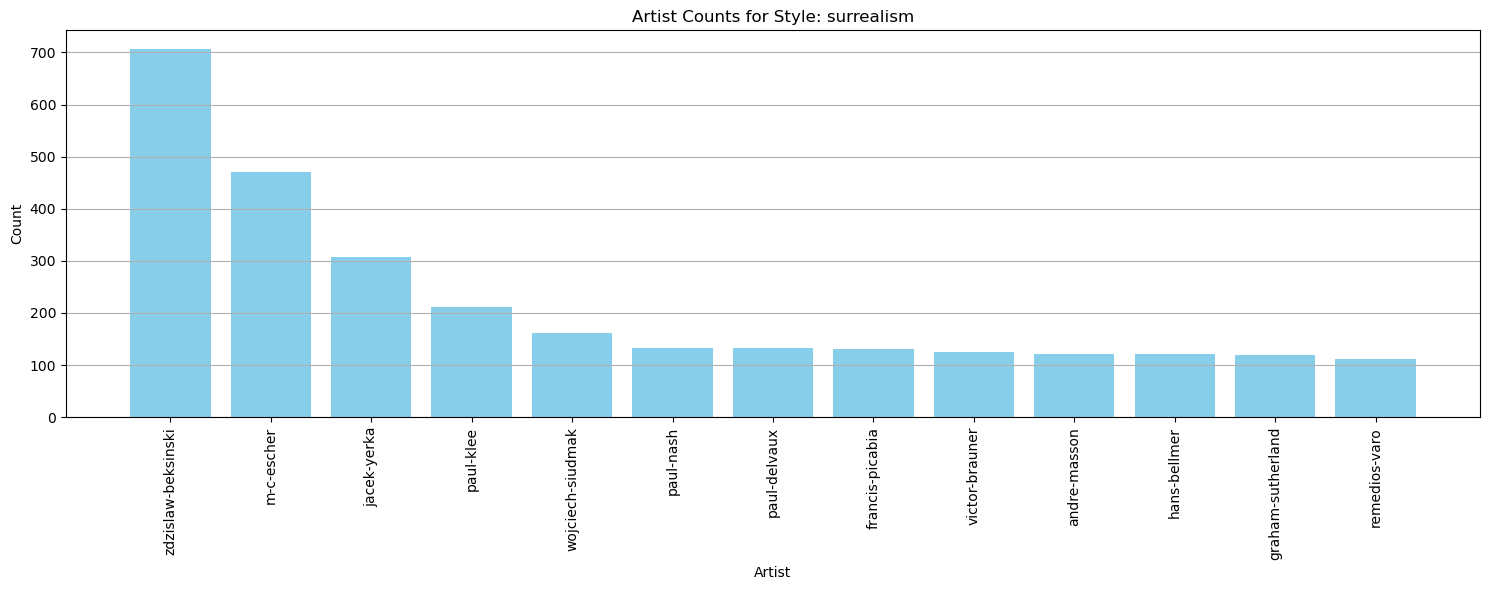

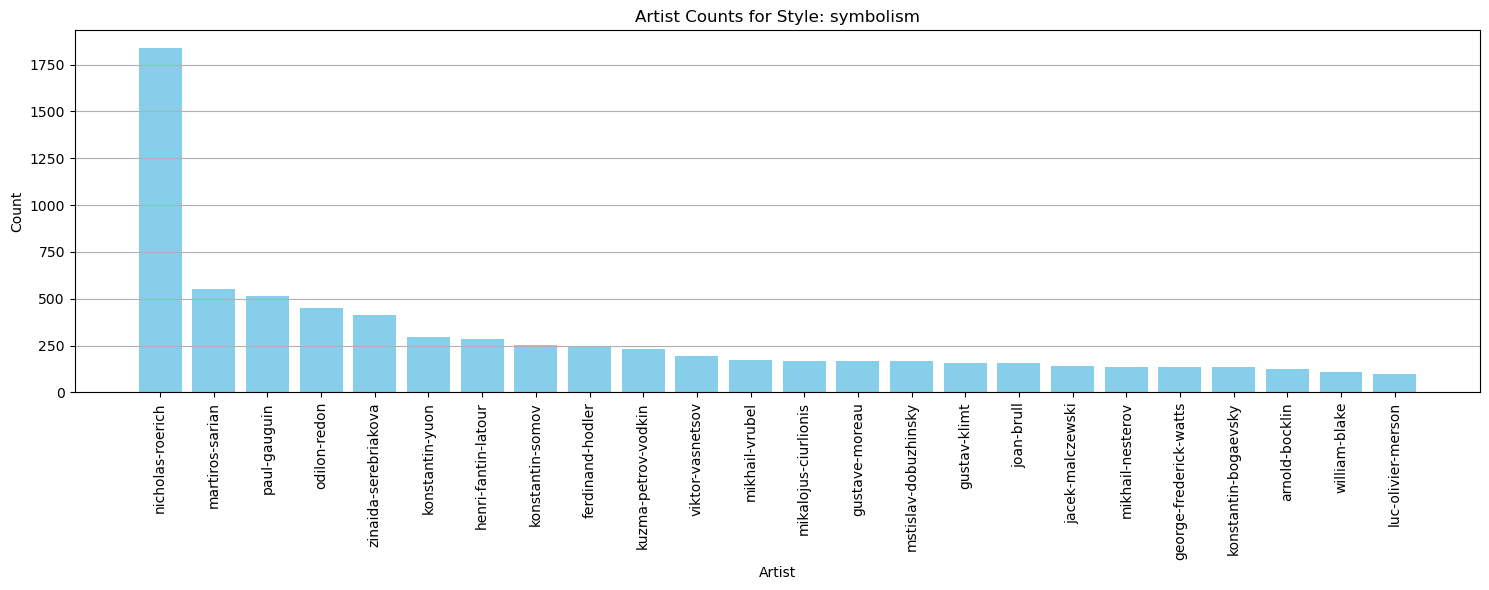

,Style,number of artists,artists with more than 100
12,romanticism,205,47
4,impressionism,178,31
3,expressionism,176,20
10,realism,168,43
13,surrealism,128,13
0,abstract_expressionism,114,12
1,baroque,110,14
8,post_impressionism,91,18
14,symbolism,73,24
2,ecole_de_paris,56,7


In [94]:
artist_count_by_style = Dataset_df.groupby(['Style', 'Artist']).size()
artist_count_by_style = artist_count_by_style.reset_index(name='Count')

# Iterate over each style and plot histogram
artists_for_style_result = pd.DataFrame(columns=['Style', 'number of artists', 'artists with more than 100'])
for style in artist_count_by_style['Style'].unique():
    data = artist_count_by_style[artist_count_by_style['Style'] == style]
    data_sorted = data.sort_values(by='Count', ascending=False)
    data_sorted_min = data_sorted[data_sorted['Count'] >= 100]
    plt.figure(figsize=(15, 6))
    plt.bar(data_sorted_min['Artist'], data_sorted_min['Count'], color='skyblue')
    plt.title(f'Artist Counts for Style: {style}')
    plt.xlabel('Artist')
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate artist names for better readability
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    new_row_data = [style, len(data_sorted), len(data_sorted_min)]
    artists_for_style_result.loc[len(artists_for_style_result)] = new_row_data

artists_for_style_result = artists_for_style_result.sort_values(by='number of artists', ascending=False)
artists_for_style_result

In [58]:
styles_per_artist = Dataset_df.groupby('Artist')['Style'].nunique()

# Filter artists with more than one style
artists_with_multiple_styles = styles_per_artist[styles_per_artist > 1]

# Create an empty list to store the results
results = []

# Iterate over the artists with multiple styles
for artist in artists_with_multiple_styles.index:
    # Filter the DataFrame for the current artist
    artist_styles = Dataset_df[Dataset_df['Artist'] == artist]['Style'].unique()
    # Append the artist name, number of styles, and the styles to the results list
    results.append((artist, len(artist_styles), artist_styles))

# Convert the results list to a DataFrame for better presentation
multiple_styles_df = pd.DataFrame(results, columns=['Artist', 'Number of Styles', 'Styles'])

from collections import Counter
from itertools import combinations

# Print the result
style_combinations = [comb for styles_list in multiple_styles_df['Styles'] for comb in combinations(styles_list, 2)]

# Count the occurrences of each style combination
style_combinations_counts = Counter(style_combinations)
style_combinations_counts = pd.DataFrame(dict(style_combinations_counts).items(), columns=['Style Combination', 'Frequency']).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [96]:
multiple_styles_df = multiple_styles_df.sort_values(by='Number of Styles', ascending=False)
multiple_styles_df

,Artist,Number of Styles,Styles
84,jozef-pankiewicz,3,"[impressionism, post_impressionism, realism]"
16,balthus,3,"[ecole_de_paris, expressionism, surrealism]"
67,jakub-schikaneder,3,"[realism, romanticism, symbolism]"
66,ivan-mrkvicka,3,"[impressionism, post_impressionism, realism]"
112,nikola-martinoski,3,"[ecole_de_paris, expressionism, realism]"
...,...,...,...
60,hovhannes-zardaryan,2,"[expressionism, realism]"
61,igor-grabar,2,"[impressionism, post_impressionism]"
62,ioannis-altamouras,2,"[impressionism, realism]"
63,irma-stern,2,"[expressionism, post_impressionism]"


In [59]:
style_combinations_counts

,Style Combination,Frequency
0,"(impressionism, realism)",35
1,"(ecole_de_paris, expressionism)",15
2,"(realism, romanticism)",12
3,"(impressionism, post_impressionism)",11
4,"(romanticism, symbolism)",9
5,"(expressionism, post_impressionism)",9
6,"(neoclassicism, romanticism)",8
7,"(ecole_de_paris, surrealism)",7
8,"(expressionism, symbolism)",7
9,"(expressionism, surrealism)",7


# Artist
1. 1230 artists
2. artists with more than 400 paintings: 40
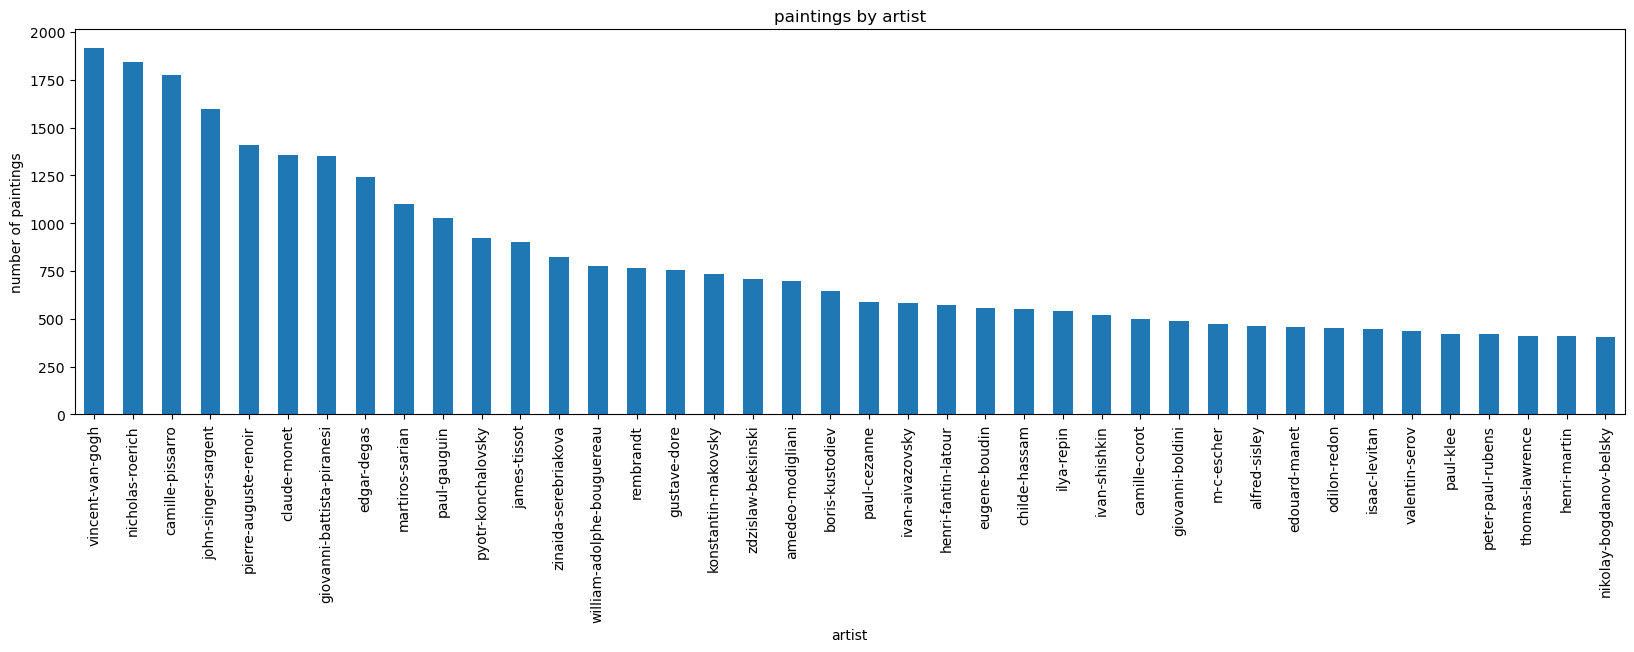

# Genre
1. 72412 genres
2. genre is not a class. It's just a description. How should we use it?
3. genres with more than 100 paintings: 11 (including 'untitled')
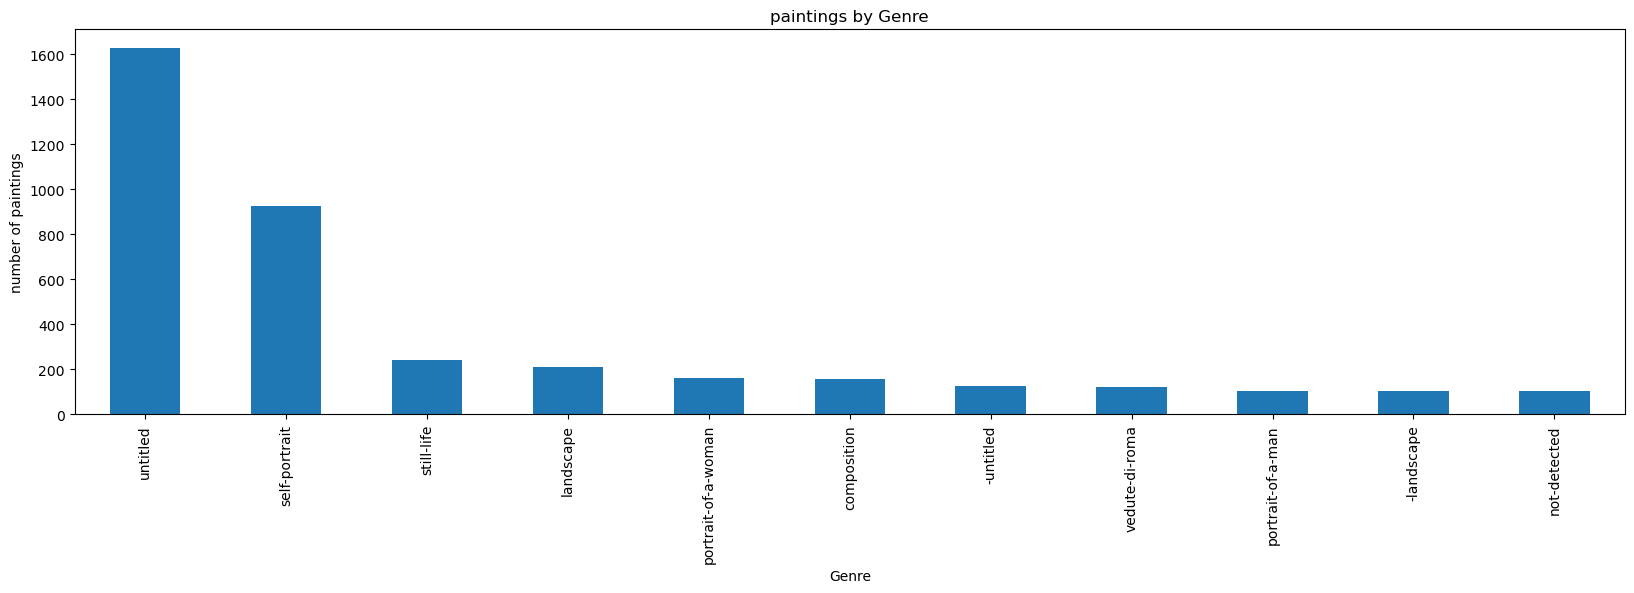

# Style
1. 15 styles
2. Except for pre_raphaelite_brotherhood, the data seems reasonable
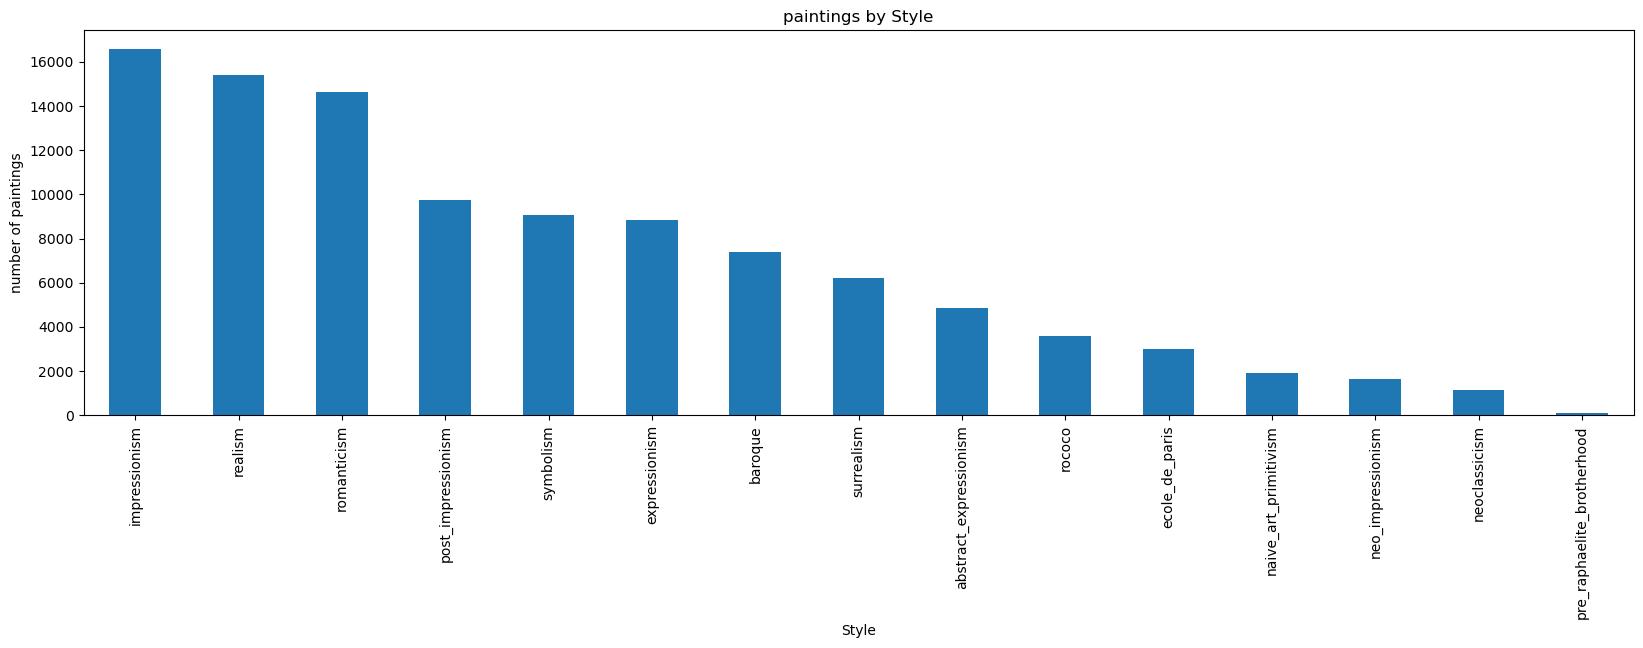

# Artist & Style
1. Many artists in each style  (refer to graphs in Artist & Style)
2. few artists(168) with multiple(2-3) styles
3. impressionism & realism / ecole_de_paris & expressionism / realism & romanticism the most frequent multiple styles

# Thoughts
1. Only use the subset: artists which has more than 400 paintings
    *problem: some styles include only one artist that satisfies this criterion
2. input size: padding
3. for application: import segmentation (a simple one)
4. What should we do with sculptures? --> delete it? 
5. Image size: padding seems more reasonable to me than cropping

